<a href="https://colab.research.google.com/github/l0ngg/diveintocode/blob/master/houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np

#[Problem 1] Obtaining a dataset
data =  pd.read_csv('train.csv')

In [50]:
#[Problem 3] Checking the data

#checking the features
print(data.columns)

df = pd.DataFrame(data)
df.describe()\

#The target variable is 'SalePrice'

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


percentage of missing values for each feature:


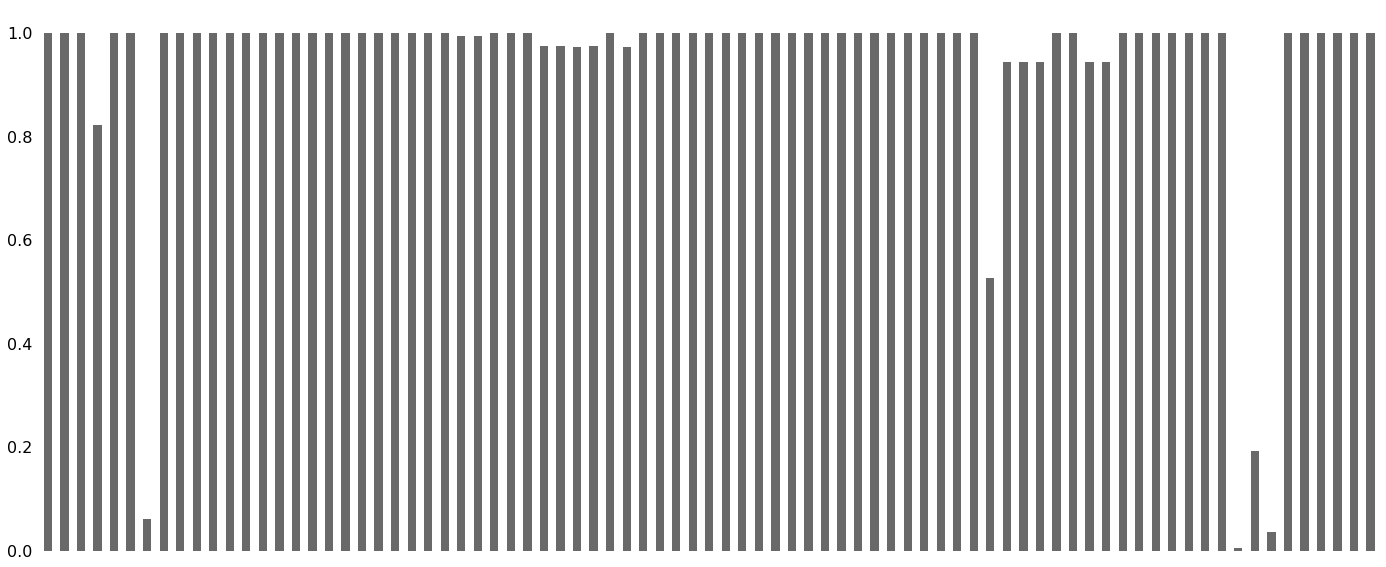

In [42]:
#[Problem 4] Dealing with missing values
import missingno as msno
%matplotlib inline
print('percentage of missing values for each feature:')
msno.bar(df)

In [45]:
# Removing all columsn with 5 or more empty values
for i in df.columns:
  if ( df[i].isnull().sum() ) > 4:
    df = df.drop(columns = [i])

print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


# [Problem 5] Researching terminology


**Skewness**

Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 


**Kurtosis**

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case

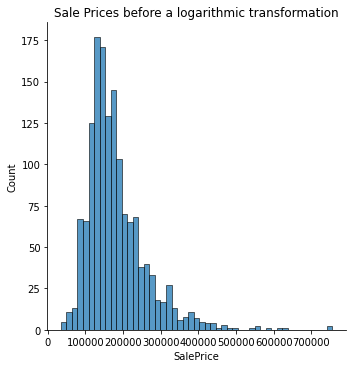

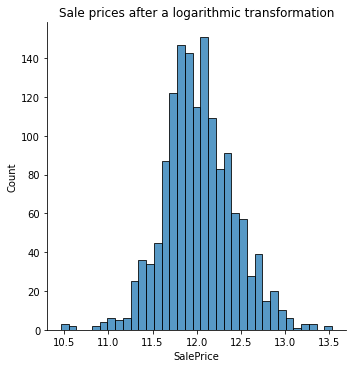

After the logarithmic transformation, the distribution of house prices is more likely to a normal distribution, 
a.k.a. more symetric,
 a.k.a. reduced skewness
kurtosis of SalePrice column before : 6.509812011089439 and after: 0.8026555069117713
skewness of SalePrice column before : 1.880940746034036 and after: 0.1212103673013655


In [67]:
## [Problem 6] Confirming distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['SalePrice'])
plt.title('Sale Prices before a logarithmic transformation')
plt.show()

loged_df = np.log(df['SalePrice'])

sns.displot(loged_df)
plt.title('Sale prices after a logarithmic transformation')
plt.show()

print('After the logarithmic transformation, the distribution of house prices is more likely to a normal distribution, \na.k.a. more symetric,\n a.k.a. reduced skewness')

from scipy.stats import kurtosis, skew
print( 'kurtosis of SalePrice column before : {} and after: {}'.format( kurtosis(df['SalePrice']),kurtosis(loged_df) ))
print( 'skewness of SalePrice column before : {} and after: {}'.format( skew(df['SalePrice']), skew(loged_df) ))

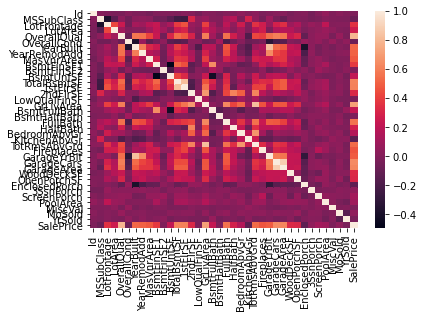

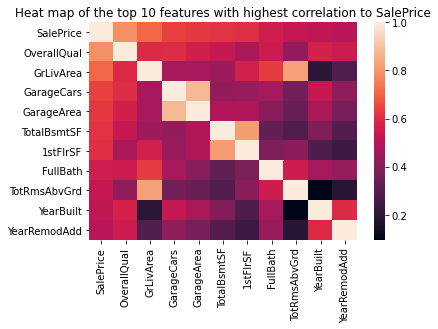

In [130]:
## [Problem 7] Confirming the correlation coefficient
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#get the top 10 features with hightest correlation (need to take 11 features because SalePrice itself is included in here)
temp2 = corr['SalePrice'].nlargest(11)

# heatmap matrix of the top 10 features with highest correlation with the SalePrice
coor2 = corr.loc[temp2.index.values][temp2.index]
sns.heatmap(coor2, 
            xticklabels=coor2.columns.values,
            yticklabels=coor2.columns.values)
plt.title('Heat map of the top 10 features with highest correlation to SalePrice')
plt.show()

**The 10 most important features to SalePrice**

OverallQual: Rates the overall material and finish of the house (10 to 1)

GrLivArea: Above grade (ground) living area square feet

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [143]:
print(coor2.columns)
lst = np.array([])
for i in coor2.columns:
  print( coor2[i].nlargest(2) )

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
SalePrice      1.000000
OverallQual    0.790982
Name: SalePrice, dtype: float64
OverallQual    1.000000
SalePrice      0.790982
Name: OverallQual, dtype: float64
GrLivArea       1.000000
TotRmsAbvGrd    0.825489
Name: GrLivArea, dtype: float64
GarageCars    1.000000
GarageArea    0.882475
Name: GarageCars, dtype: float64
GarageArea    1.000000
GarageCars    0.882475
Name: GarageArea, dtype: float64
TotalBsmtSF    1.00000
1stFlrSF       0.81953
Name: TotalBsmtSF, dtype: float64
1stFlrSF       1.00000
TotalBsmtSF    0.81953
Name: 1stFlrSF, dtype: float64
FullBath     1.000000
GrLivArea    0.630012
Name: FullBath, dtype: float64
TotRmsAbvGrd    1.000000
GrLivArea       0.825489
Name: TotRmsAbvGrd, dtype: float64
YearBuilt       1.000000
YearRemodAdd    0.592855
Name: YearBuilt, dtype: float64
Ye

Based on this, we can determine that the 3 couple of: *GrLivArea - TotRmsAbvGrd , GarageCars - GarageArea and TotalBsmtSf - 1stFlrSF* have the highest correlation between each other in the 10 selected features

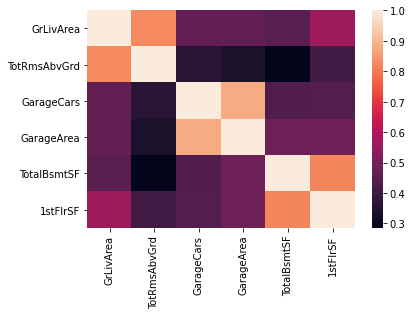

In [149]:
lst1 = ['GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
combinations = coor2.loc[lst1][lst1]

sns.heatmap(combinations, 
            xticklabels=combinations.columns.values,
            yticklabels=combinations.columns.values)
plt.show()